In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yfinance as yf 
import datetime as date

In [2]:
stock_symbol = 'RELIANCE.NS'
start_date = '2017-09-14'
end_date = '2024-10-14'
data=yf.download(stock_symbol,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
df=data

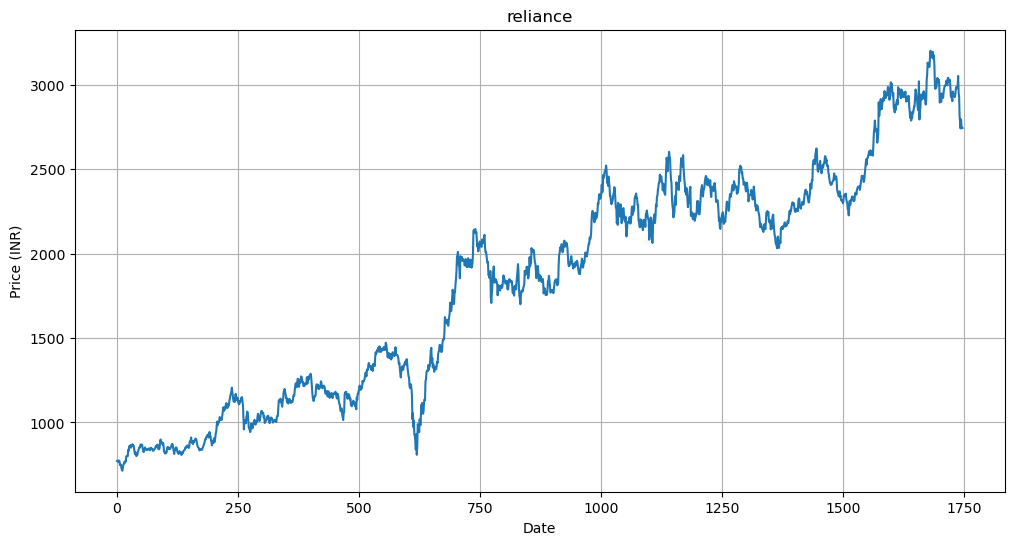

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title('reliance')
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [6]:
train =pd.DataFrame(data[0:int(len(data)*0.70)])
test=pd.DataFrame(data[int(len(data)*0.70):int(len(data))])

In [7]:
scaler= MinMaxScaler(feature_range=(0, 1))
train_close=train.iloc[:,4:5].values
test_close=test.iloc[:,4:5].values
data_training_array=scaler.fit_transform(train_close)
data_testing_array=scaler.transform(test_close)

In [8]:
X_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [9]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LSTM
from tensorflow.keras.models import Sequential

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32),
    Dense(1)
])

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
import tensorflow as tf 
model.compile(optimizer='adam',loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
history=model.fit(X_train,y_train,epochs=20,verbose=1)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.0613 - mean_absolute_error: 0.1700
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0037 - mean_absolute_error: 0.0453
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0035 - mean_absolute_error: 0.0423
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0029 - mean_absolute_error: 0.0394
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0035 - mean_absolute_error: 0.0438
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0028 - mean_absolute_error: 0.0378
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0030 - mean_absolute_error: 0.0409
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0023 - mean_absolute_error: 0.0354
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0027 - mean_absolute_error: 0.0388
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0023 - mean_absolute_error: 0.0356
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 

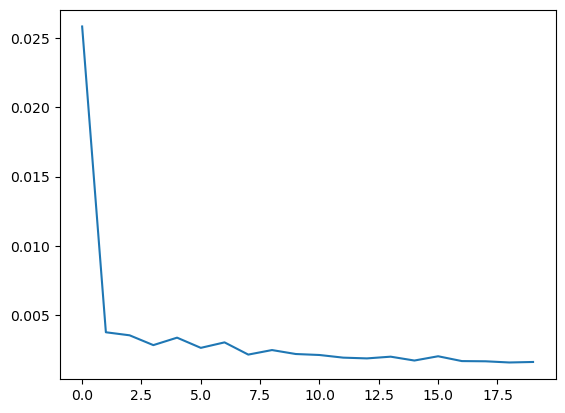

In [13]:
plt.plot(history.history['loss'])

In [14]:

test_close.shape

(525, 1)

In [15]:
past_100_days = pd.DataFrame(train_close[-100:])

In [16]:
test_df = pd.DataFrame(test_close)

In [17]:

final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [18]:
final_df.head()

,0
0,2431.873291
1,2451.348633
2,2458.594238
3,2423.843262
4,2417.382324


In [19]:
input_data=scaler.fit_transform(final_df)
#input_data

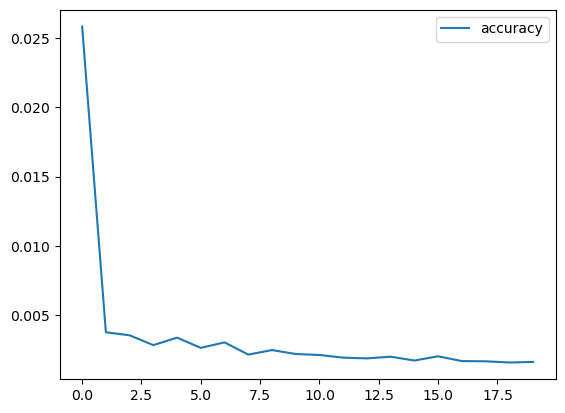

In [20]:
plt.plot(history.history['loss'],label='accuracy')

plt.legend()

In [21]:

x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [22]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(525, 100, 1)
(525,)


In [23]:
y_pred=model.predict(x_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [24]:
scaling_factor_number=scaler.scale_[0]

In [25]:
scale_factor=1/scaling_factor_number
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

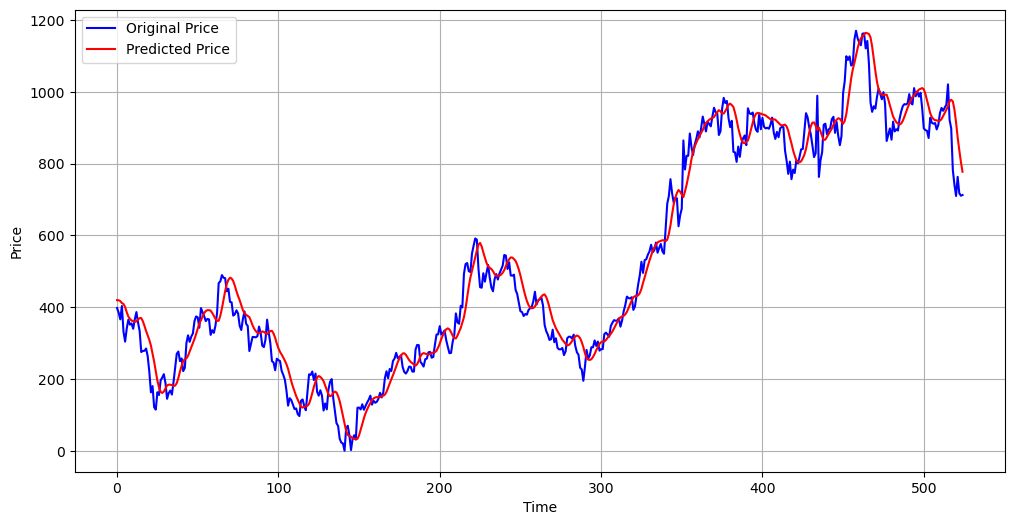

In [26]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 8.15%


In [28]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9682327801518711


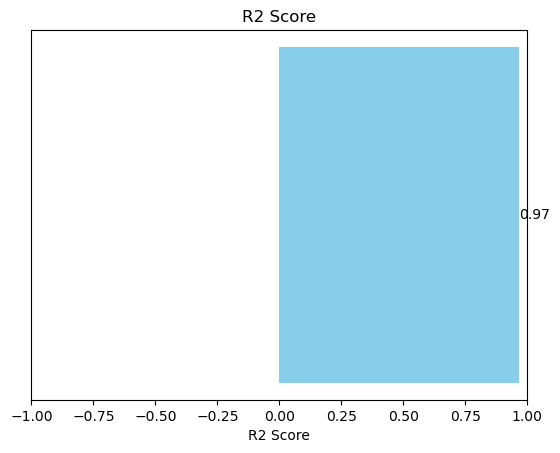

In [29]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()